In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop(["sales"], axis=1)
y = df.sales

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = polynomial_converter.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
test_predictions = lm.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [14]:
MAE

0.48967980448035164

In [15]:
RMSE

0.6646431757268965

In [16]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    lm = LinearRegression()
    lm.fit(X_train, y_train)

    train_predictions = lm.predict(X_train)
    test_predictions = lm.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


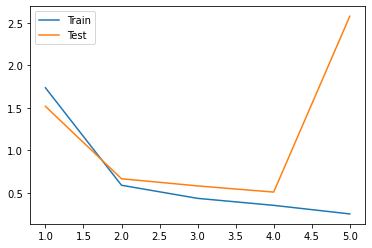

In [22]:
plt.plot(range(1, 6), train_rmse_errors[:5], label="Train")
plt.plot(range(1, 6), test_rmse_errors[:5], label="Test")
plt.legend()

In [23]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [24]:
final_model = LinearRegression()

In [25]:
full_converter_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converter_X, y)

LinearRegression()

In [26]:
from joblib import dump, load
dump(final_model, "./final_poly_model.joblib")
dump(final_poly_converter, "./final_poly_converter.joblib")

['./final_poly_converter.joblib']

In [27]:
loaded_model = load("./final_poly_model.joblib")
loaded_converter = load("./final_poly_converter.joblib")

In [28]:
campaign = [[149, 22, 12]]
transformed_data = loaded_converter.fit_transform(campaign)

In [29]:
loaded_model.predict(transformed_data)

array([14.64501014])